In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df1 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=1, batch_size=128, 2025-06-11.csv")
df2 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-06-11.csv")
df3 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=8, batch_size=128, 2025-06-11.csv")
df4 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-06-11.csv")

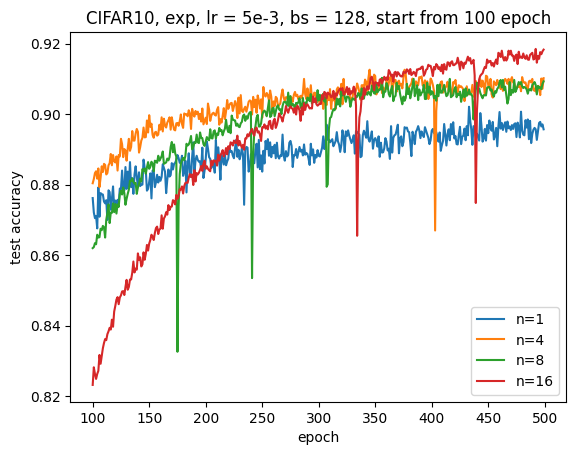

In [9]:
i = "test_accuracy(average)"
s = 100

plt.plot(df1[i][s:], label="n=1")
plt.plot(df2[i][s:], label="n=4")
plt.plot(df3[i][s:], label="n=8")
plt.plot(df4[i][s:], label="n=16")
plt.xlabel("epoch")
plt.ylabel("test accuracy")
plt.title(f"CIFAR10, exp, lr = 5e-3, bs = 128, start from {s} epoch")
plt.legend()
plt.show()

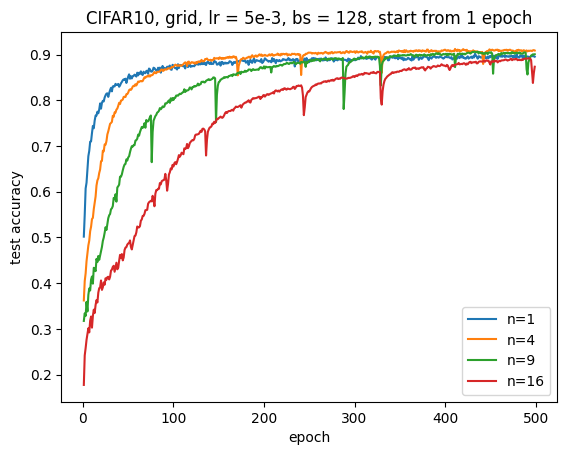

In [6]:
df1 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=1, batch_size=128, 2025-06-11.csv")
df2 = pd.read_csv("./grid, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-06-15.csv")
df3 = pd.read_csv("./grid, PushPull, lr=0.005, n_nodes=9, batch_size=128, 2025-06-15.csv")
df4 = pd.read_csv("./grid, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-06-15.csv")

i = "test_accuracy(average)"
s = 1

plt.plot(df1[i][s:], label="n=1")
plt.plot(df2[i][s:], label="n=4")
plt.plot(df3[i][s:], label="n=9")
plt.plot(df4[i][s:], label="n=16")
plt.xlabel("epoch")
plt.ylabel("test accuracy")
plt.title(f"CIFAR10, grid, lr = 5e-3, bs = 128, start from {s} epoch")
plt.legend()
plt.show()

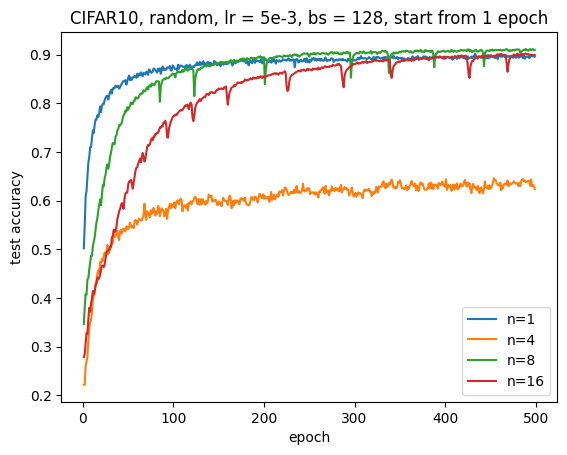

In [9]:
df1 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=1, batch_size=128, 2025-06-11.csv")
df2 = pd.read_csv("./random, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-06-15.csv")
df3 = pd.read_csv("./random, PushPull, lr=0.005, n_nodes=8, batch_size=128, 2025-06-15.csv")
df4 = pd.read_csv("./random, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-06-15.csv")

i = "test_accuracy(average)"
s = 1

plt.plot(df1[i][s:], label="n=1")
plt.plot(df2[i][s:], label="n=4")
plt.plot(df3[i][s:], label="n=8")
plt.plot(df4[i][s:], label="n=16")
plt.xlabel("epoch")
plt.ylabel("test accuracy")
plt.title(f"CIFAR10, random, lr = 5e-3, bs = 128, start from {s} epoch")
plt.legend()
plt.show()

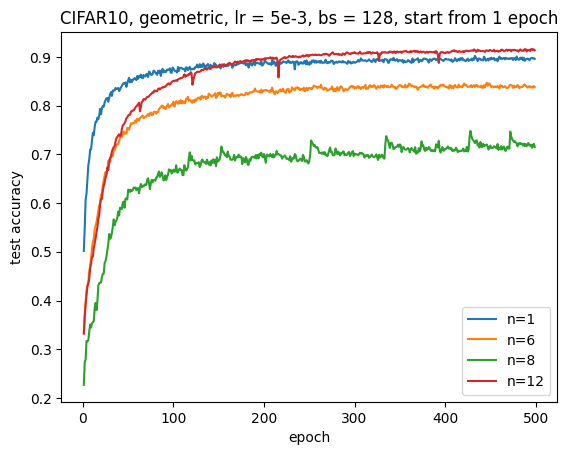

In [12]:
df1 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=1, batch_size=128, 2025-06-11.csv")
df2 = pd.read_csv("./geometric, PushPull, lr=0.005, n_nodes=6, batch_size=128, 2025-06-15.csv")
df3 = pd.read_csv("./geometric, PushPull, lr=0.005, n_nodes=8, batch_size=128, 2025-06-15.csv")
df4 = pd.read_csv("./geometric, PushPull, lr=0.005, n_nodes=12, batch_size=128, 2025-06-15.csv")

i = "test_accuracy(average)"
s = 1

plt.plot(df1[i][s:], label="n=1")
plt.plot(df2[i][s:], label="n=6")
plt.plot(df3[i][s:], label="n=8")
plt.plot(df4[i][s:], label="n=12")
plt.xlabel("epoch")
plt.ylabel("test accuracy")
plt.title(f"CIFAR10, geometric, lr = 5e-3, bs = 128, start from {s} epoch")
plt.legend()
plt.show()

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

def prettyshow_accuracy(grads, legend, save='image.pdf', ylabel='Gradient Norm', start=100):
    plt.rcParams['figure.figsize'] = 12, 8
    
    plt.figure()
    
    # 确保所有数据长度一致
    min_len = min(len(grad) for grad in grads)
    grads = [grad[:min_len] for grad in grads]
    
    # 对每个grad进行切片，确保start不超过数据长度
    start = min(start, min_len - 1)
    grads = [grad[start:].reset_index(drop=True) for grad in grads]
    xlen = len(grads[0])
    
    if xlen == 0:
        print("警告：切片后数据为空，请检查start值")
        return
        
    colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown']
    markers = ['d', '^', 'o', '<', '*', 's']
    # 确保至少有一个标记点
    n_markers = min(10, xlen)
    idx_set = np.linspace(0, xlen-1, n_markers, dtype=int)
    
    # 创建从start开始的x轴值
    x_values = np.arange(start, start + xlen)
    
    for i in range(len(grads)):
        plt.plot(start, grads[i][0], color=colors[i], marker=markers[i], markersize=8)
    
    for i in range(len(grads)):
        for idx in idx_set:
            plt.plot(x_values[idx], grads[i][idx], color=colors[i], marker=markers[i], markersize=15, linestyle='None')
    
    for i in range(len(grads)):
        plt.plot(x_values, grads[i], linewidth=4, color=colors[i])
    
    plt.legend(legend, prop={'size': 35, 'weight': 'bold'}, loc='lower right', 
               bbox_to_anchor=(0.95, 0.05), ncol=1)
    plt.xlabel('Epochs', fontsize=47, fontweight='bold')
    plt.ylabel(ylabel, fontsize=47, fontweight='bold')
    
    # 设置 y 轴范围为 0 到 100
    #plt.ylim(0, 100)
    
    # 设置 y 轴刻度为 0%, 20%, 40%, 60%, 80%, 100%
    #plt.yticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=35, fontweight='bold')
    plt.yticks([77.5,80,82.5,85,87.5,90,92.5], ['77.5%', '80%', '82.5%', '85%', '87.5%', '90%', '92.5%'], fontsize=35, fontweight='bold')
    
    # 设置科学记数法格式
    ax = plt.gca()
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    formatter.set_powerlimits((3, 6))  # 当数值超过1e3或1e6时使用科学记数法
    ax.xaxis.set_major_formatter(formatter)
    
    # 调整刻度数量和间隔
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    
    # 设置刻度标签和偏移文本的字体
    plt.xticks(fontsize=35, fontweight='bold')
    ax.xaxis.get_offset_text().set_fontsize(25)  # 调整科学记数法指数字体大小
    ax.xaxis.get_offset_text().set_fontweight('bold')
    
    plt.grid(True)
    plt.title("Exponential", fontsize=47, fontweight='bold')
    plt.subplots_adjust(left=0.21, bottom=0.15)
    plt.subplots_adjust(left=0.21, bottom=0.15, right=0.75)
    plt.savefig(save, bbox_inches='tight')
    plt.show()

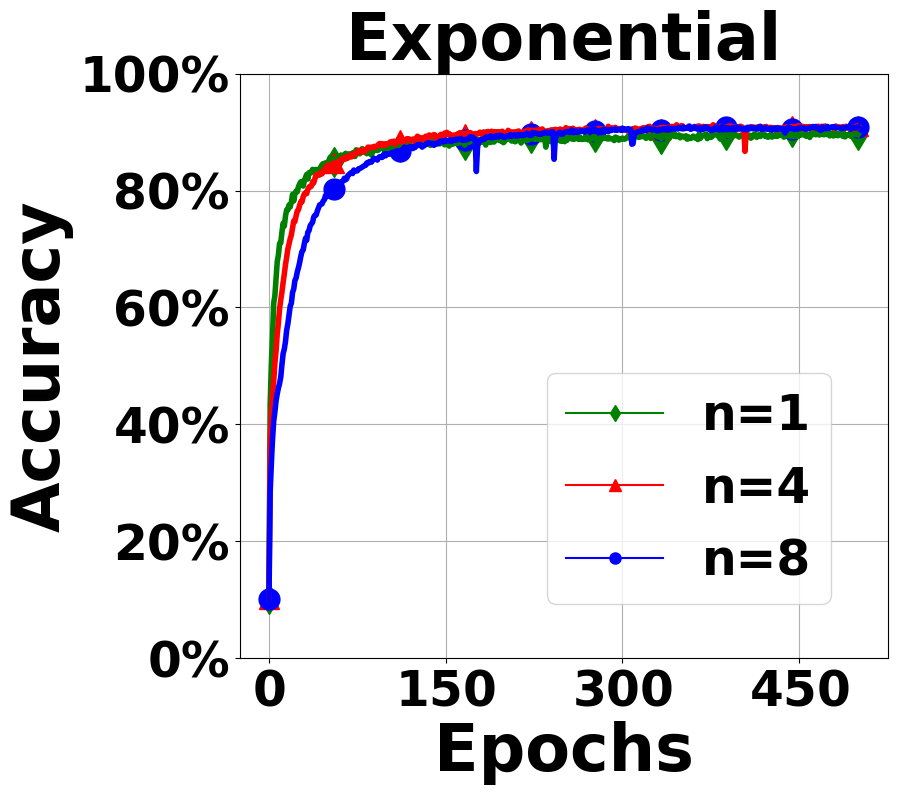

In [16]:
df1 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=1, batch_size=128, 2025-06-11.csv")
df2 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-06-11.csv")
df3 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=8, batch_size=128, 2025-06-11.csv")
df4 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-06-11.csv")
a = "test_accuracy(average)"

i=100
s = 0  # 从开始就取数据

# 使用更安全的切片方式，并重置索引
df1 = df1.iloc[s:].reset_index(drop=True)
df2 = df2.iloc[s:].reset_index(drop=True)
df3 = df3.iloc[s:].reset_index(drop=True)
df4 = df4.iloc[s:].reset_index(drop=True)

grads = [
    df1[a]*i,
    df2[a]*i,
    df3[a]*i,
    #df4[a]*i,
]
legend = [
    "n=1",
    "n=4",
    "n=8",
    #"n=16",
]

prettyshow_accuracy(grads, legend, save='/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/CIFAR10最终实验/exp_acc_0.pdf', ylabel='Accuracy', start=0)

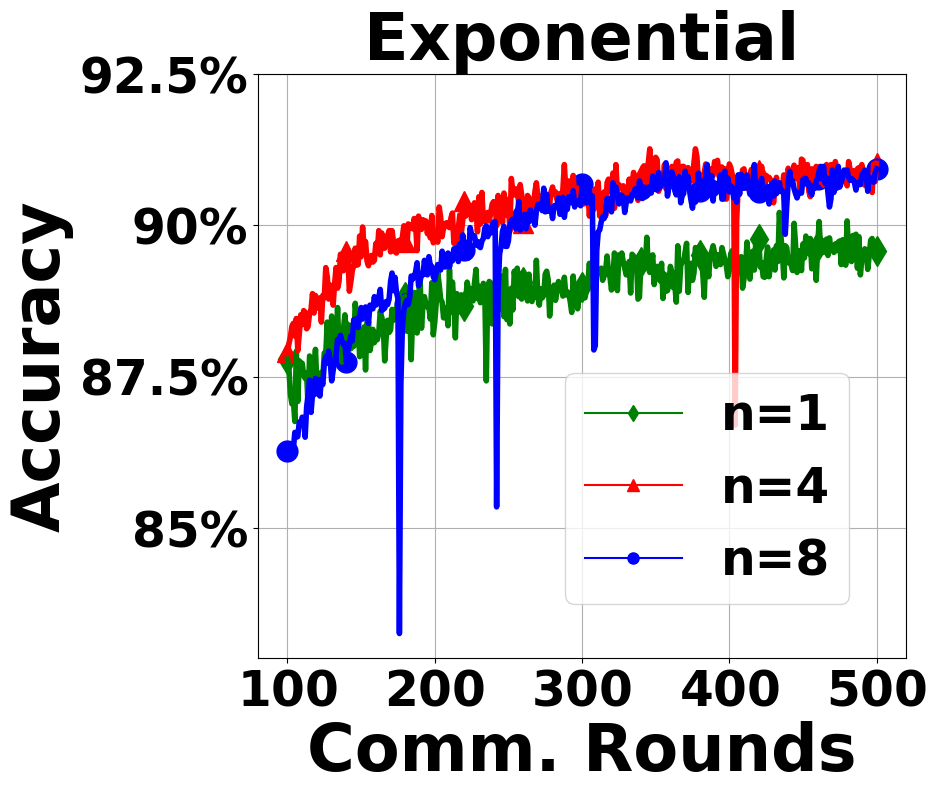

In [75]:
df1 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=1, batch_size=128, 2025-06-11.csv")
df2 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-06-11.csv")
df3 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=8, batch_size=128, 2025-06-11.csv")
#df4 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-06-11.csv")
a = "test_accuracy(average)"

i=100
s = 100  # 从开始就取数据

# # 使用更安全的切片方式，并重置索引
# df1 = df1.iloc[s:].reset_index(drop=True)
# df2 = df2.iloc[s:].reset_index(drop=True)
# df3 = df3.iloc[s:].reset_index(drop=True)
# #df4 = df4.iloc[s:].reset_index(drop=True)

grads = [
    df1[a]*i,
    df2[a]*i,
    df3[a]*i,
    #df4[a]*i,
]
legend = [
    "n=1",
    "n=4",
    "n=8",
    #"n=16",
]

prettyshow_accuracy(grads, legend, save='/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/CIFAR10最终实验/exp_acc_100.pdf', ylabel='Accuracy', start=100)

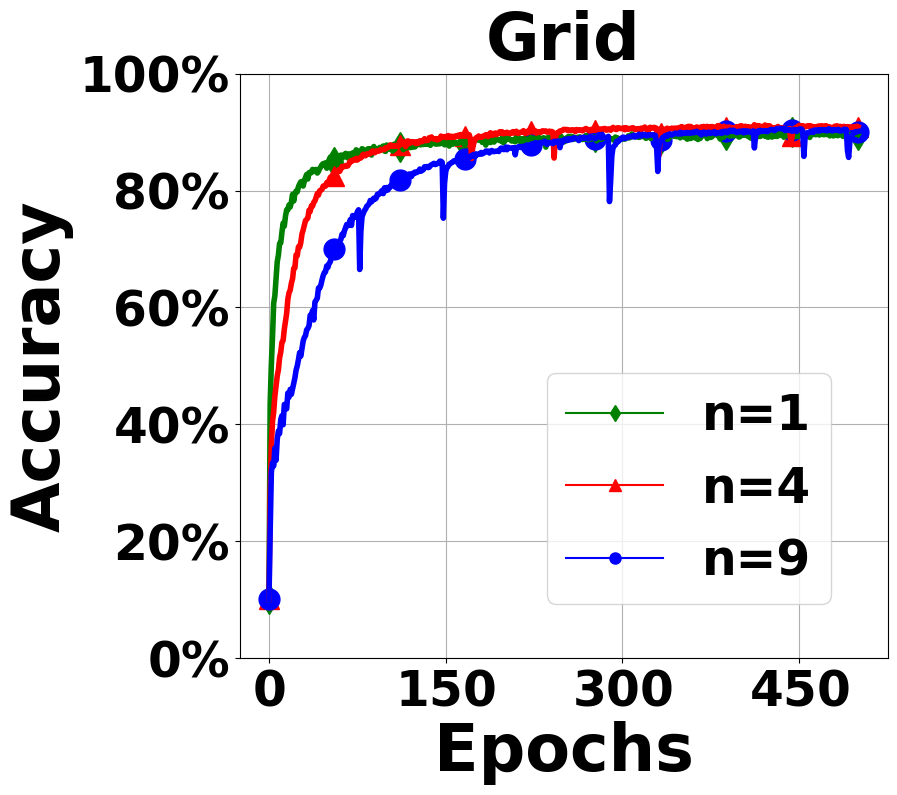

In [14]:
df1 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=1, batch_size=128, 2025-06-11.csv")
df2 = pd.read_csv("./grid, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-06-15.csv")
df3 = pd.read_csv("./grid, PushPull, lr=0.005, n_nodes=9, batch_size=128, 2025-06-15.csv")
df4 = pd.read_csv("./grid, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-06-15.csv")
a = "test_accuracy(average)"

i=100

grads = [
    df1[a]*i,
    df2[a]*i,
    df3[a]*i,
    #df4[a]*i,
]
legend = [
    "n=1",
    "n=4",
    "n=9",
    #"n=16",
]

prettyshow_accuracy(grads, legend, save='/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/CIFAR10最终实验/grid_acc_0.pdf', ylabel='Accuracy', start=0)

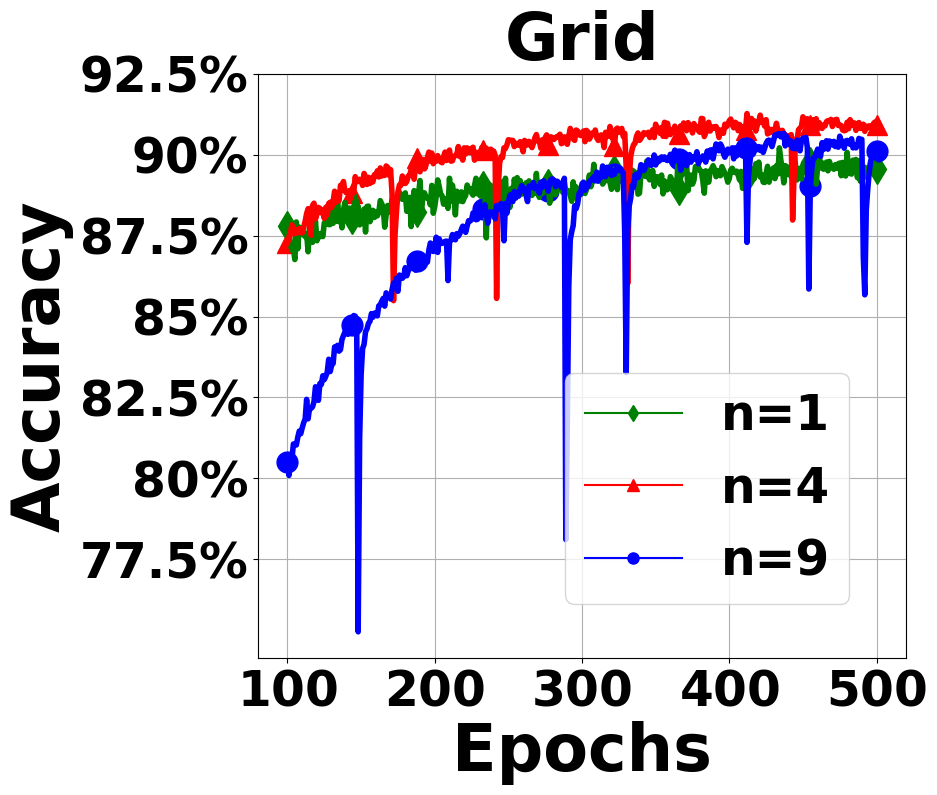

In [10]:
df1 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=1, batch_size=128, 2025-06-11.csv")
df2 = pd.read_csv("./grid, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-06-15.csv")
df3 = pd.read_csv("./grid, PushPull, lr=0.005, n_nodes=9, batch_size=128, 2025-06-15.csv")
df4 = pd.read_csv("./grid, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-06-15.csv")
a = "test_accuracy(average)"

i=100

grads = [
    df1[a]*i,
    df2[a]*i,
    df3[a]*i,
    #df4[a]*i,
]
legend = [
    "n=1",
    "n=4",
    "n=9",
    #"n=16",
]

prettyshow_accuracy(grads, legend, save='/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/CIFAR10最终实验/grid_acc_100.pdf', ylabel='Accuracy', start=100)

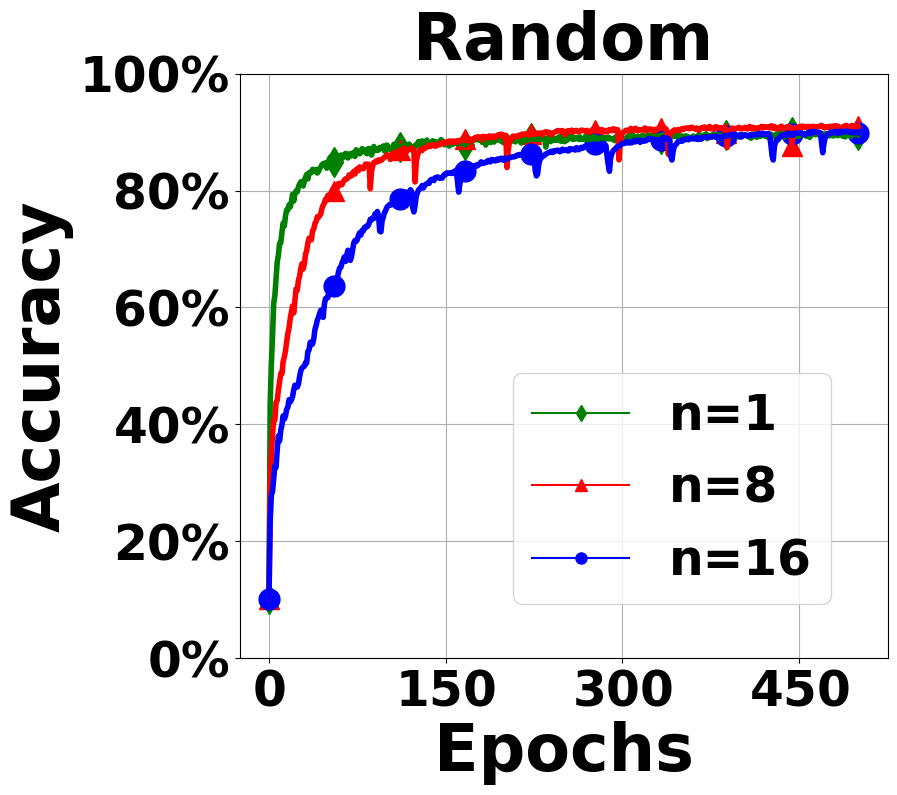

In [7]:
df1 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=1, batch_size=128, 2025-06-11.csv")
df2 = pd.read_csv("./random, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-06-15.csv")
df3 = pd.read_csv("./random, PushPull, lr=0.005, n_nodes=8, batch_size=128, 2025-06-15.csv")
df4 = pd.read_csv("./random, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-06-15.csv")
a = "test_accuracy(average)"

i=100

grads = [
    df1[a]*i,
    #df2[a]*i,
    df3[a]*i,
    df4[a]*i,
]
legend = [
    "n=1",
    #"n=4",
    "n=8",
    "n=16",
]

prettyshow_accuracy(grads, legend, save='/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/CIFAR10最终实验/random_acc_0.pdf', ylabel='Accuracy', start=0)

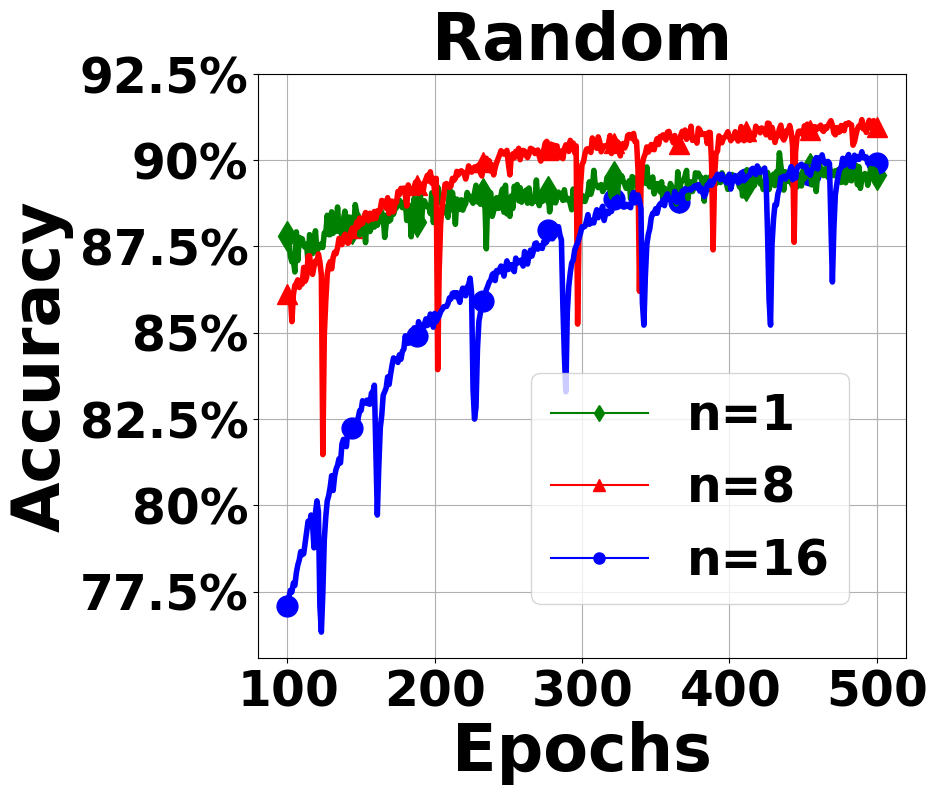

In [12]:
df1 = pd.read_csv("./null, PushPull, lr=0.005, n_nodes=1, batch_size=128, 2025-06-11.csv")
df2 = pd.read_csv("./random, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-06-15.csv")
df3 = pd.read_csv("./random, PushPull, lr=0.005, n_nodes=8, batch_size=128, 2025-06-15.csv")
df4 = pd.read_csv("./random, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-06-15.csv")
a = "test_accuracy(average)"

i=100

grads = [
    df1[a]*i,
    #df2[a]*i,
    df3[a]*i,
    df4[a]*i,
]
legend = [
    "n=1",
    #"n=4",
    "n=8",
    "n=16",
]

prettyshow_accuracy(grads, legend, save='/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/CIFAR10最终实验/random_acc_100.pdf', ylabel='Accuracy', start=100)